In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pdb

from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
from pprint import pprint

import polyphase as phase

from skimage.transform import resize
from skimage.io import imread, imread_collection, imshow
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import re
from polyphase.parallel import get_distance_matrix

In [42]:
images = imread_collection('../data/cherrypick/*.png')
tagger = re.compile('../data/cherrypick/(.*)_(.*)_(.*).png')

img0 = resize(images[0], (64,64))
img0_tags = tagger.findall(images.files[0])

img1 = resize(images[1], (64,64))
img1_tags = tagger.findall(images.files[1])

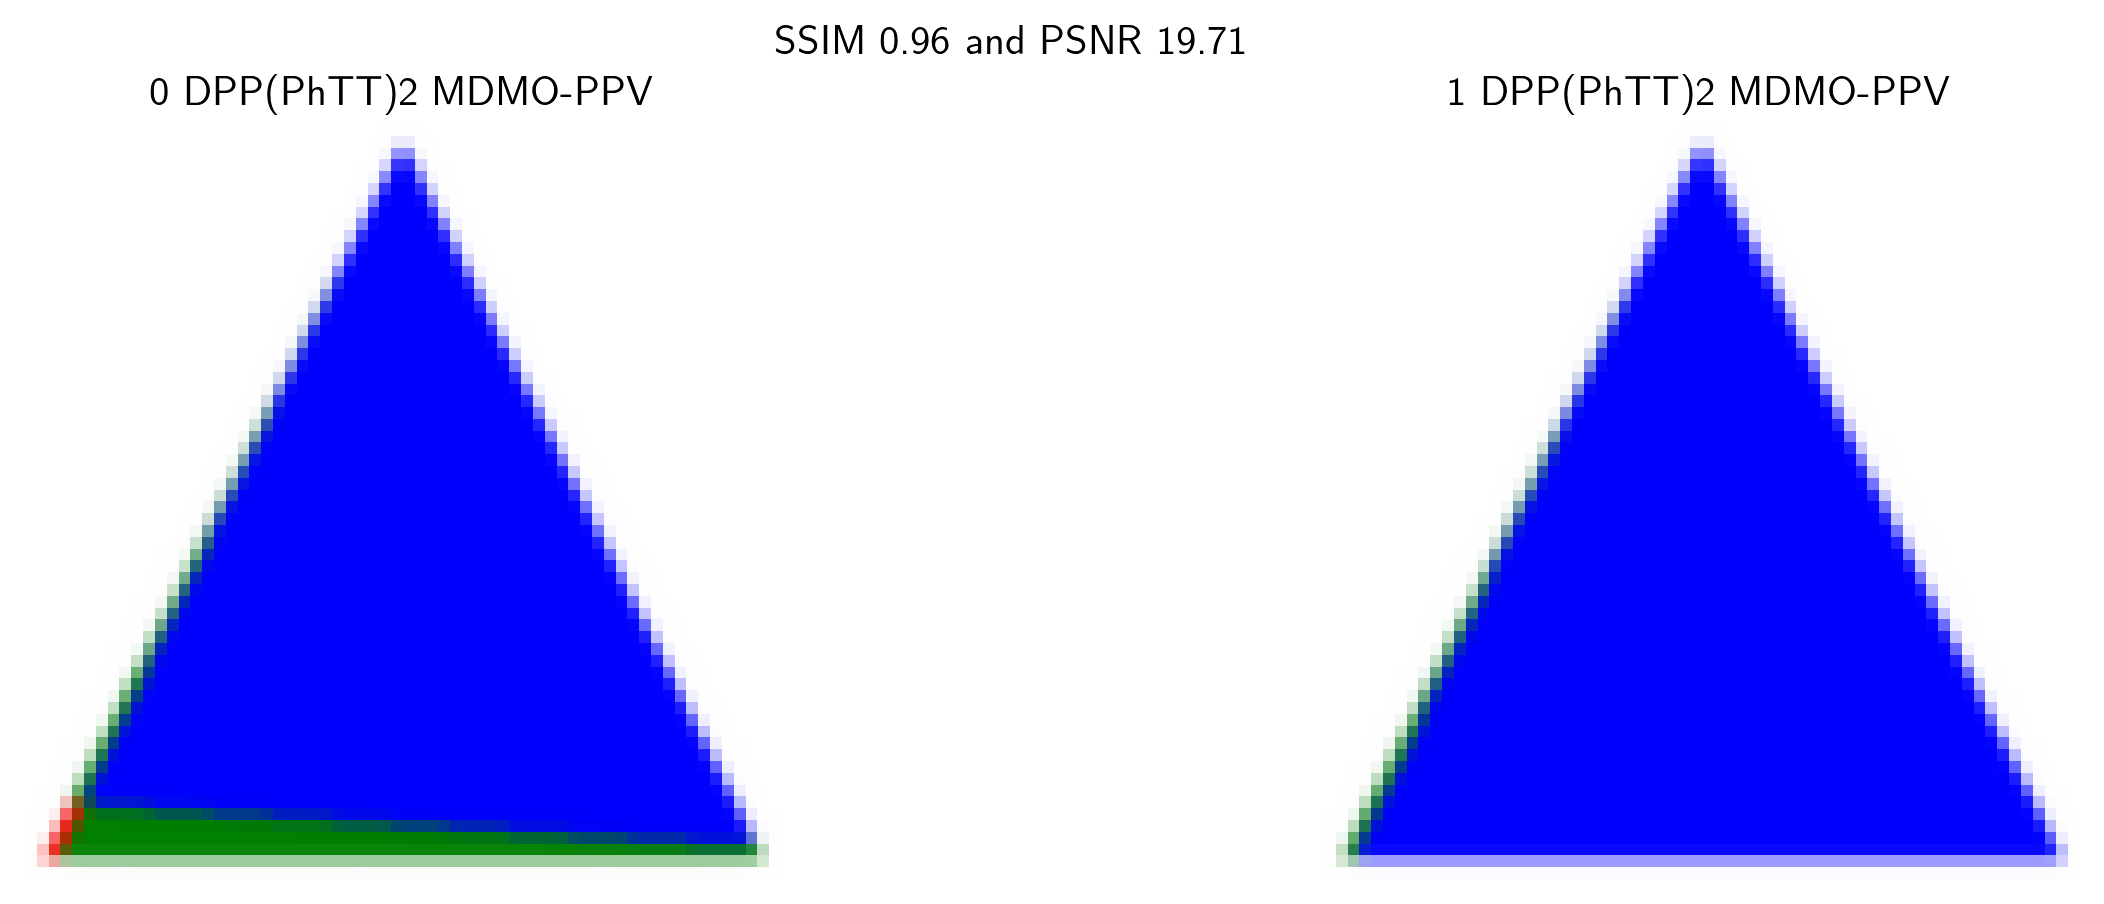

In [43]:
fig, ax = plt.subplots(1,2, figsize=(2*4*1.6, 4), dpi=250)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0].imshow(img0)
ax[0].set_title(list(map(" ".join, img0_tags))[0] )
ax[0].axis('off')
ax[1].imshow(img1)
ax[1].set_title(list(map(" ".join, img1_tags))[0] )
ax[1].axis('off')
SSIM = ssim(img0, img1, multichannel=True)
PSNR = psnr(img0, img1)
title = 'SSIM {:.2f} and PSNR {:.2f}'.format(SSIM, PSNR)
fig.suptitle(title)
plt.show()

In [44]:
def get_ssim_distance(img0, img1):
    """ Given two images in img0, img1 compute distance"""
    
    img0 = resize(img0, (64,64))
    img1 = resize(img1, (64,64))
    d = ssim(img0, img1, multichannel=True)
    
    return d

images_dir = '../data/cherrypick/*.png'
images = imread_collection(images_dir)

print('Total of {} phase diagrams'.format(len(images)))

M = get_distance_matrix(images, get_ssim_distance) 

2020-08-24 15:57:31,070	ERROR worker.py:655 -- Calling ray.init() again after it has already been called.


Total of 6 phase diagrams
(pid=13601) Staging 0 on 10.111.7.27
(pid=13609) Staging 1 on 10.111.7.27
(pid=13613) Staging 2 on 10.111.7.27
(pid=13628) Staging 3 on 10.111.7.27
(pid=13630) Staging 4 on 10.111.7.27
Processed : 4 took 00 Hr:00 min:10.79 sec 
Processed : 3 took 00 Hr:00 min:23.18 sec 
Processed : 2 took 00 Hr:00 min:32.16 sec 
Processed : 1 took 00 Hr:00 min:45.99 sec 
Processed : 0 took 00 Hr:00 min:54.37 sec 

Computation took : 00 Hr:00 min:54.40 sec


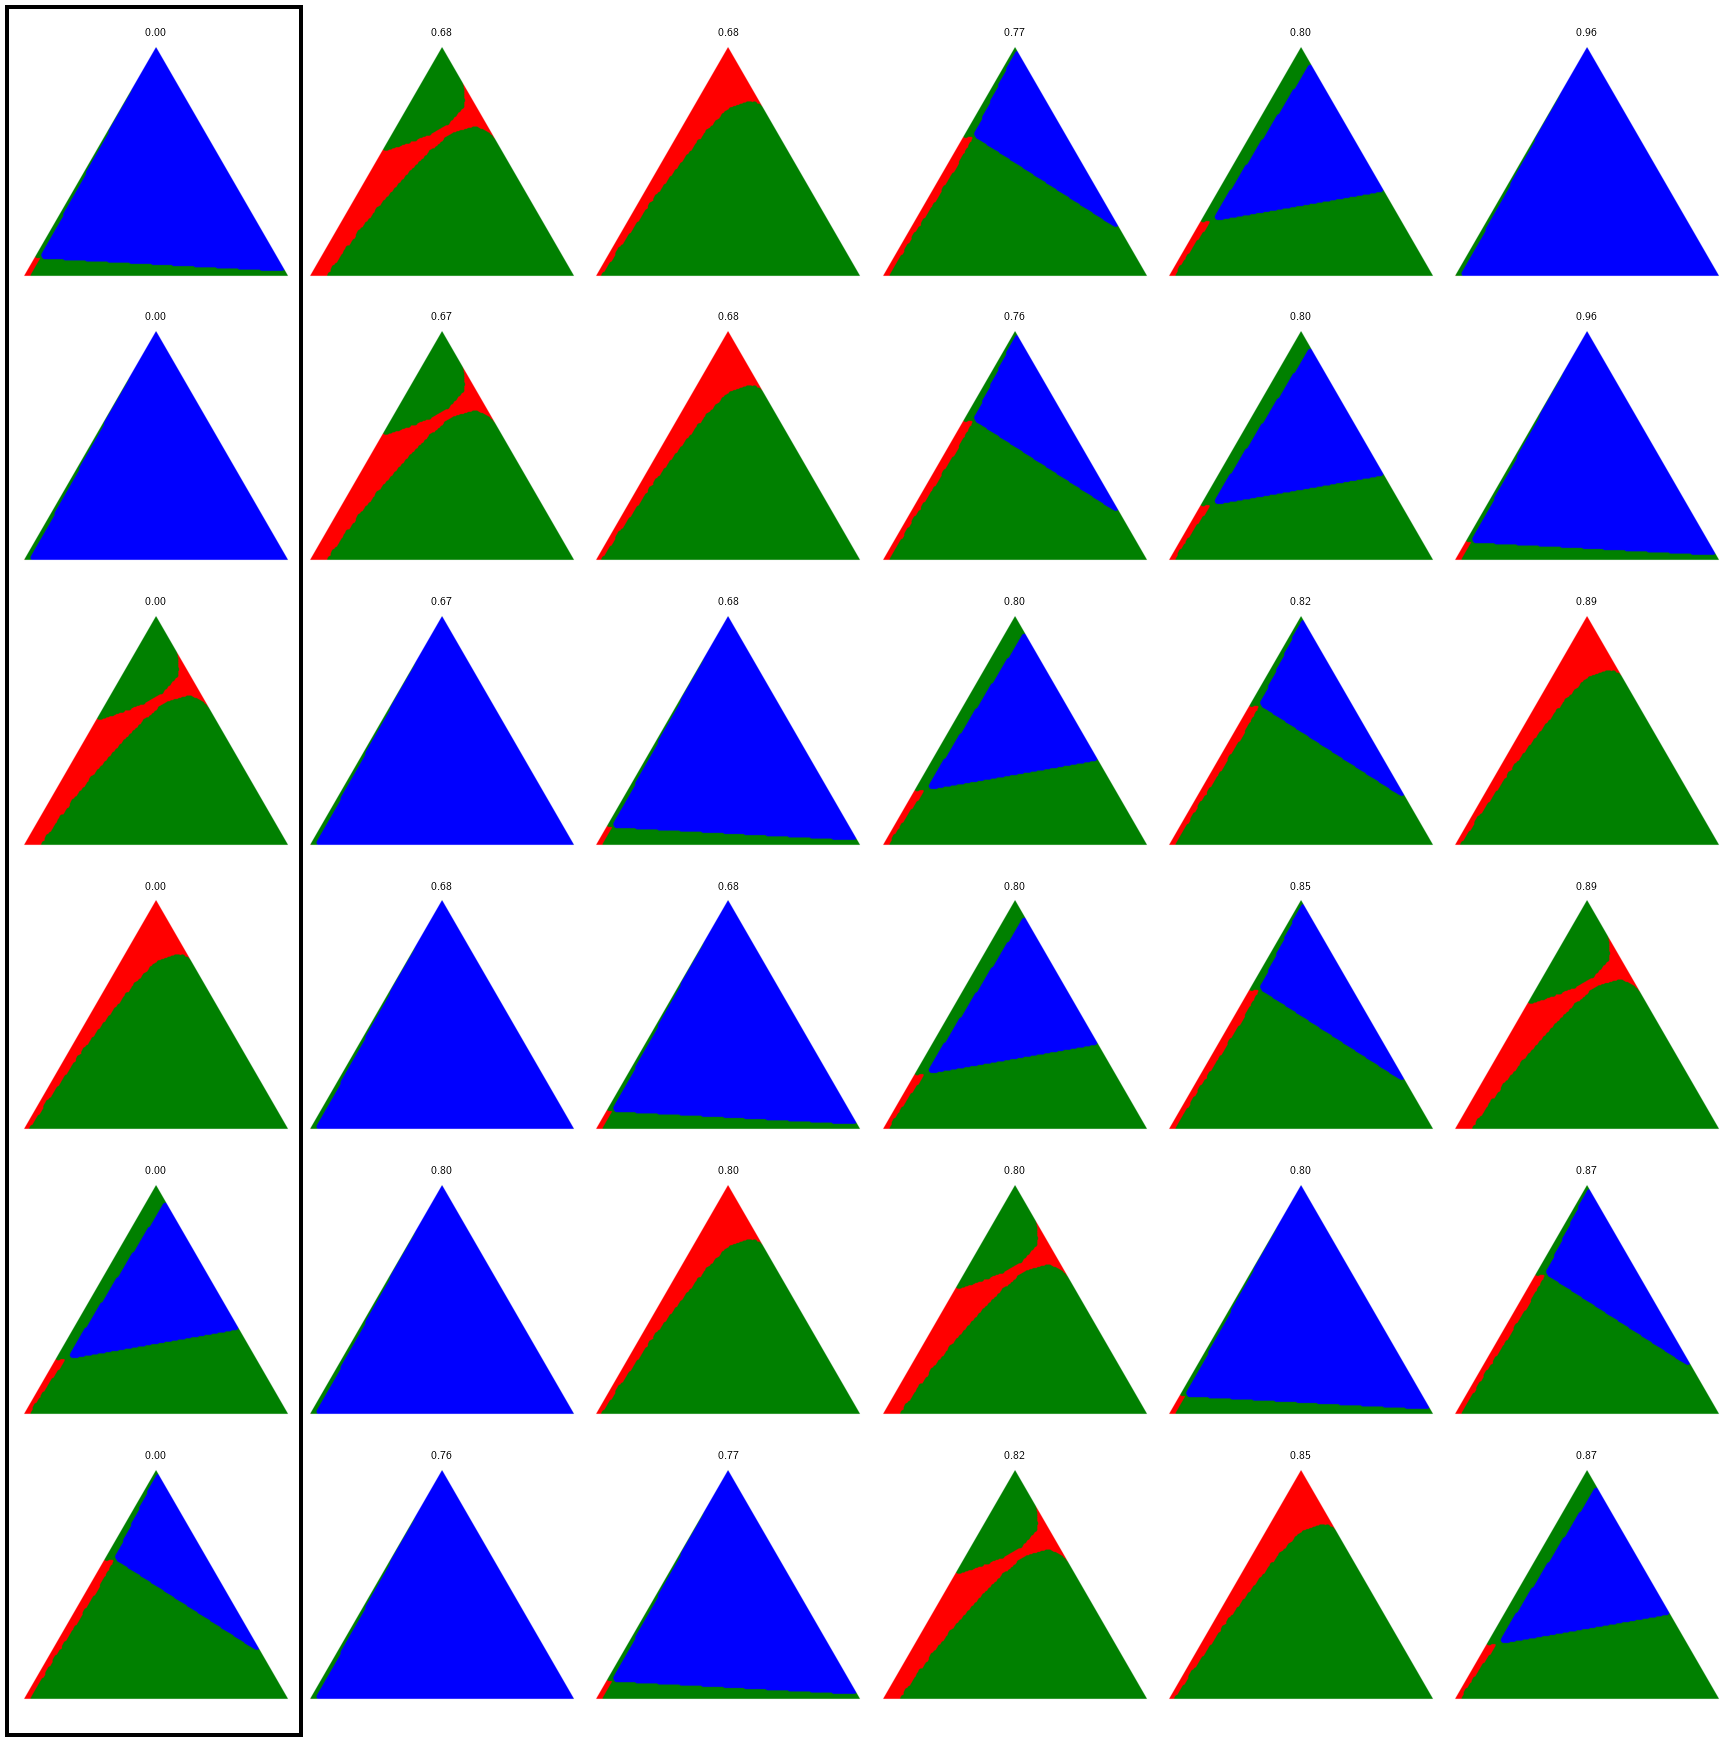

In [67]:
# test for cherry picked phase diagrams if the measure actually makes sens
fig, ax_grid = plt.subplots(6, 6, figsize=(24,24))
for im_id, ax_row in enumerate(ax_grid):    
    sort_idx = np.argsort(M[im_id,:])
    for ax, ind in zip(ax_row, sort_idx):
        ax.imshow(images[ind])
        ax.axis('off')
        ax.set_title('{:.2f}'.format(M[im_id,ind]))

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.0, 0.0), 0.17, 1.0, fill=False, color="k", lw=4, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

plt.tight_layout()        
plt.savefig('../figures/notebooks/ssim_cherrypick_grid.png', dpi=400, bbox_inches='tight')